In [ ]:
# Banka datası pairplot çizin, sonra doğrusal bağlantı görürseniz onu hedef değişken olarak seçip regresyon yapın. 

#VALUE olsun bence. 

In [2]:
import pandas as pd
import numpy as np

bankdata = pd.read_csv("C:/Users/cakahraman/Desktop/Data Science Bootcamp/hmelq.txt")

In [3]:
bankdata.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [4]:
import seaborn as sns
sns.pairplot(bankdata,kind="reg")
#Regression Pair plot

C:\Users\cakahraman\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\cakahraman\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


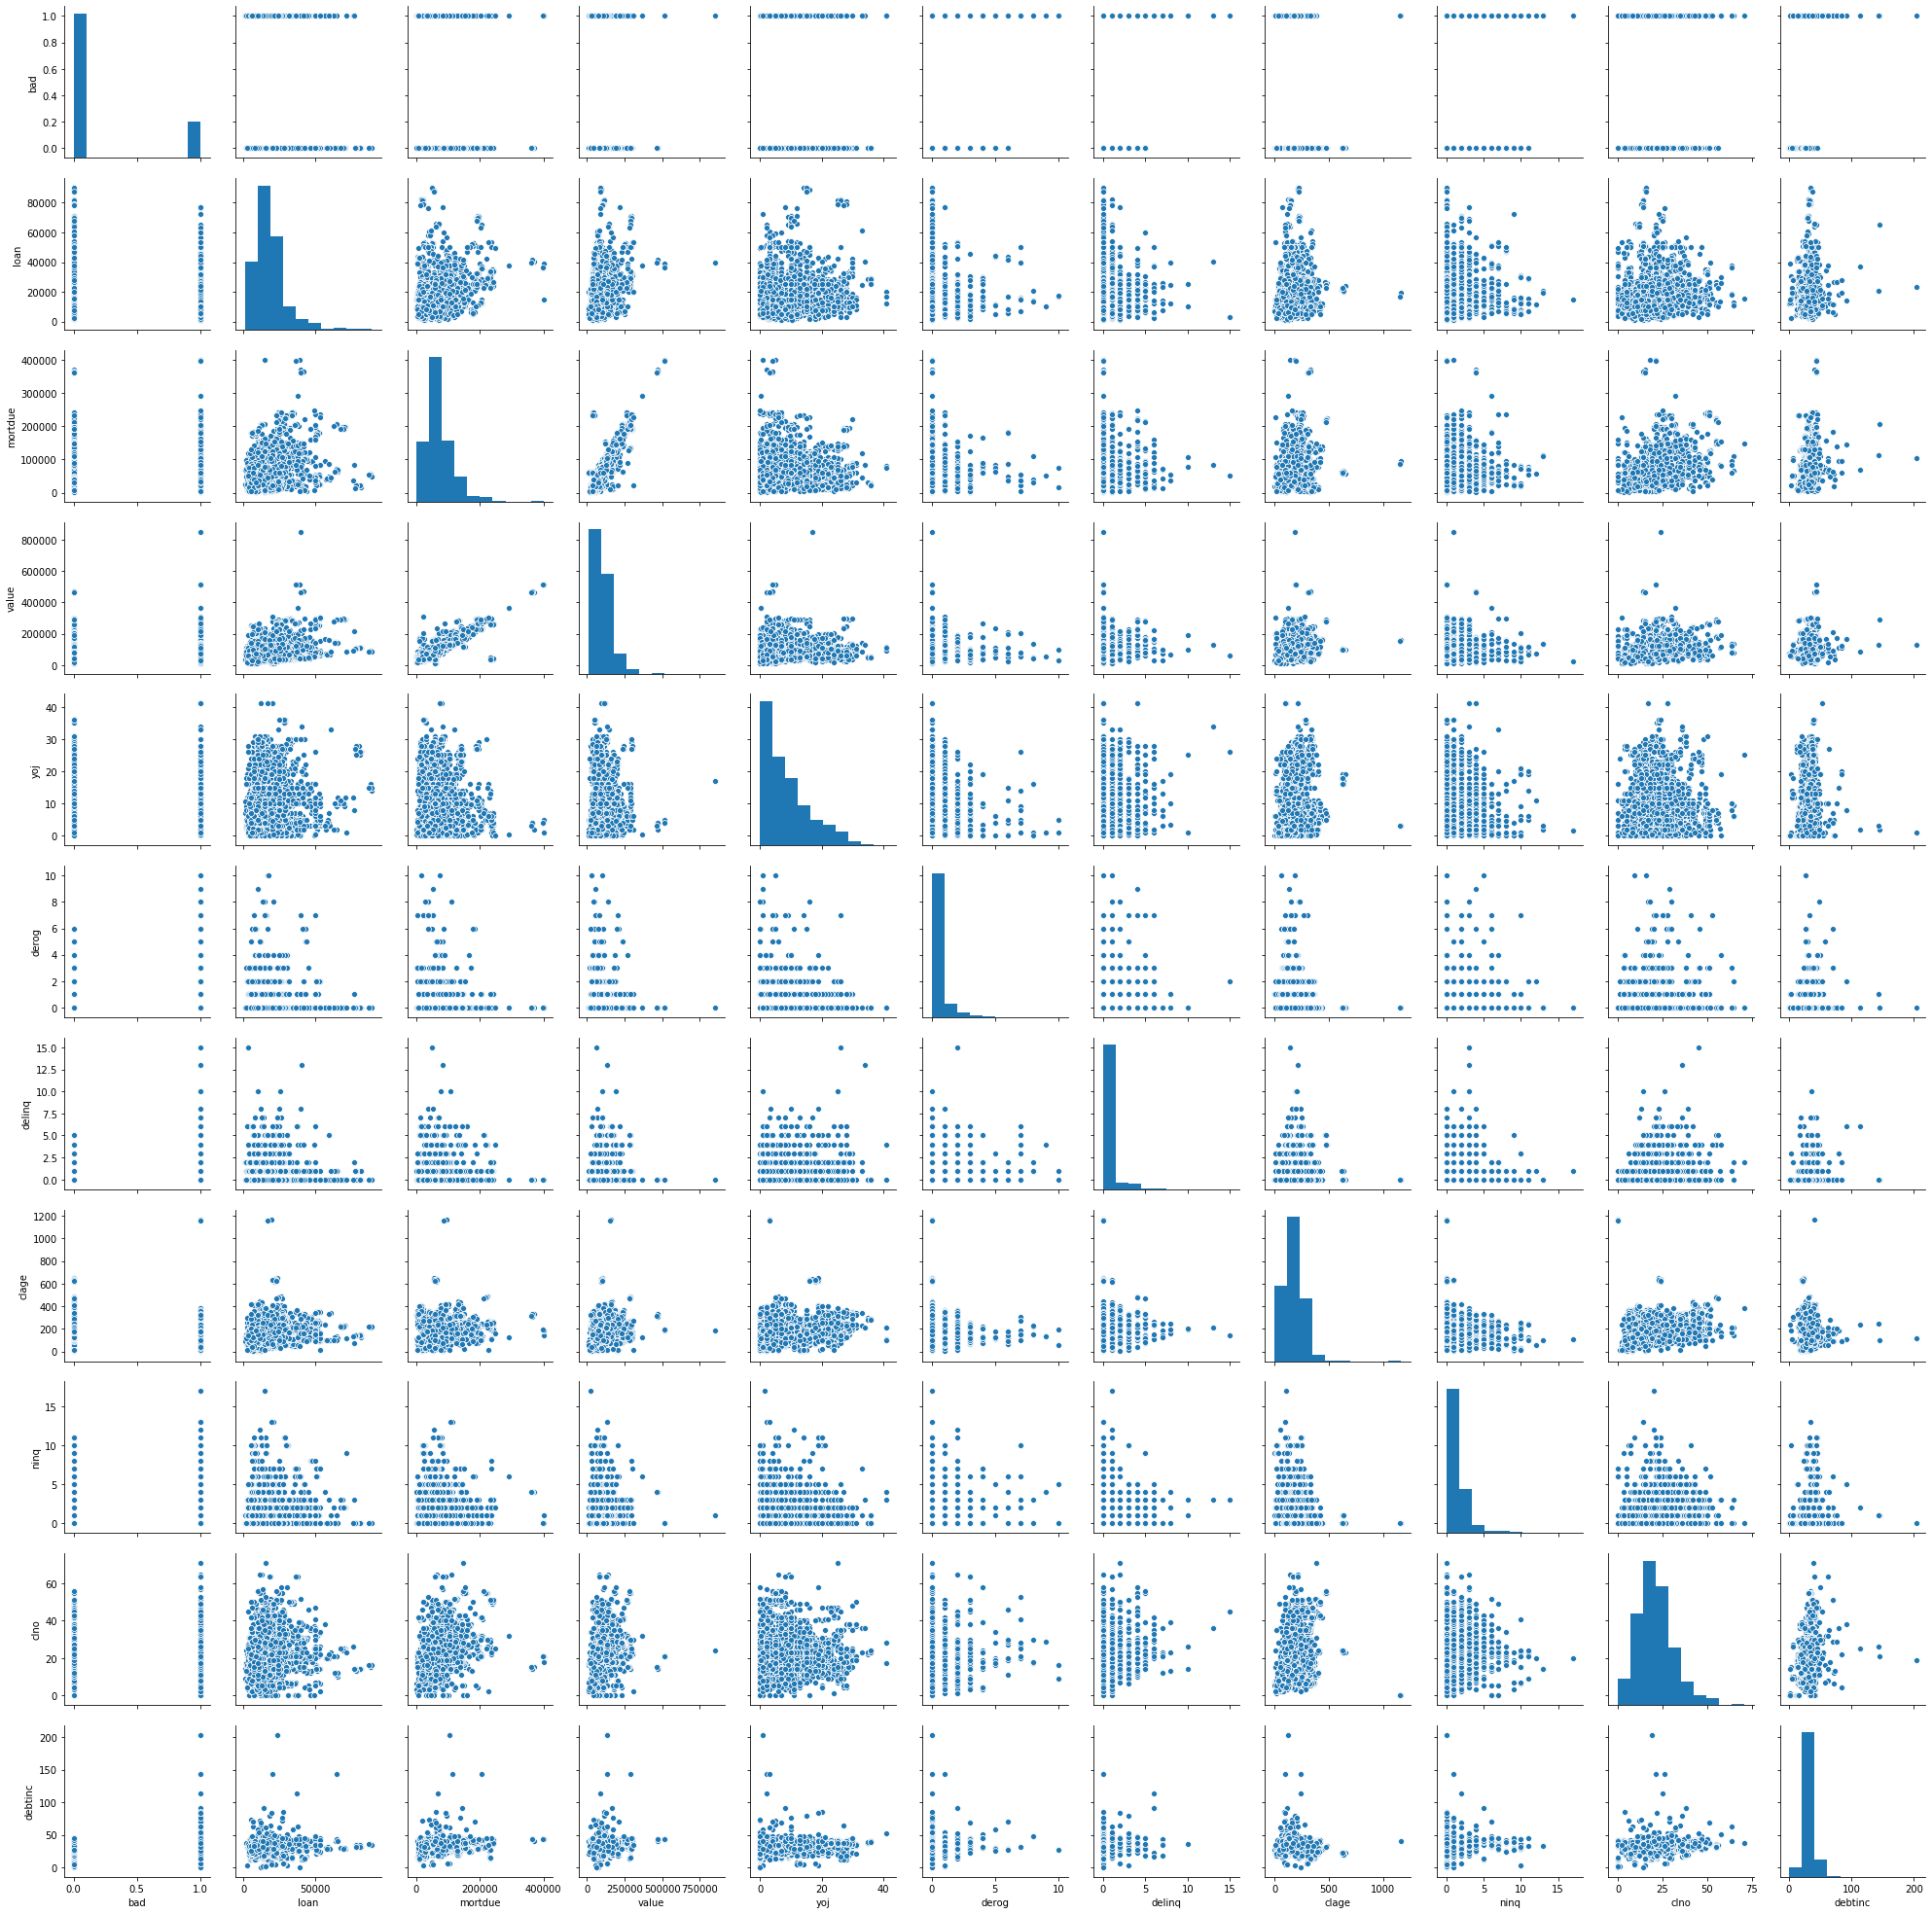

In [5]:
sns.pairplot(bankdata, kind = "scatter")
#Scatter pairplot

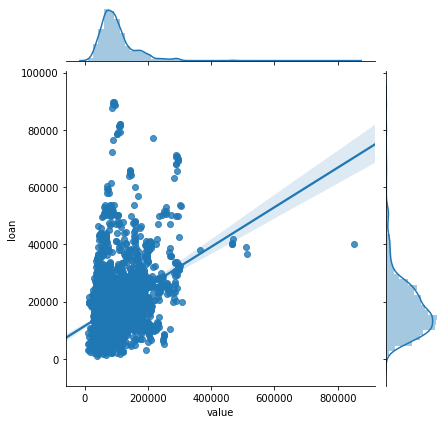

In [6]:
sns.jointplot(x = "value", y = "loan", data = bankdata, kind = "reg")

In [7]:
y = bankdata["value"]
y.head()

0    108355.0
1    127384.0
2     61266.0
3     71027.0
4     78358.0
Name: value, dtype: float64

In [8]:
X1 = bankdata[["loan"]]
X1.head()

,loan
0,81200
1,12600
2,18000
3,10300
4,9400


In [9]:
X2 = bankdata[["mortdue"]]
X2.head()


,mortdue
0,18834.0
1,103960.0
2,46865.0
3,57676.0
4,56508.0


In [10]:
bankdata["value"].isnull().values.any()

True

In [11]:
import numpy as np
X2[np.isnan(X2)] = 0
y[np.isnan(y)] = 0
X1[np.isnan(X1)] = 0 
#Make non values 0

C:\Users\cakahraman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cakahraman\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\cakahraman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

In [12]:
import statsmodels.api as sm
#X1 = sm.add_constant(X1) 
#X2 = sm.add_constant(X2)

In [13]:
lm = sm.OLS(y,X1)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.682
Method:                 Least Squares   F-statistic:                              7666.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):                        0.00
Time:                        22:37:20   Log-Likelihood:                         -44664.
No. Observations:                3576   AIC:                                  8.933e+04
Df Residuals:                    3575   BIC:                                  8.934e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan           4.3406      0.050     87.555      0.000       4.243       4.438
==============================================================================
Omnibus:                      539.610   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7804.714
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                      10.228   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
lm2 = sm.OLS(y,X2)
model2 = lm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  value   R-squared (uncentered):                   0.880
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                          2.632e+04
Date:                Tue, 17 Sep 2019   Prob (F-statistic):                        0.00
Time:                        22:37:25   Log-Likelihood:                         -42915.
No. Observations:                3576   AIC:                                  8.583e+04
Df Residuals:                    3575   BIC:                                  8.584e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
mortdue        1.3003      0.008    162.230      0.000       1.285       1.316
==============================================================================
Omnibus:                     1964.053   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1256938.753
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                      94.814   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import numpy as np
a = model2.predict(X2)
difference = y-a
difference.head()

0    83865.573998
1    -7792.846507
2      328.496041
3    -3967.803762
4     4881.920331
dtype: float64

In [18]:
errorrate = difference/y
errorrate.head()

0    0.773989
1   -0.061176
2    0.005362
3   -0.055863
4    0.062303
dtype: float64

In [23]:
x_data = range(0,bankdata.shape[0])
x_data

range(0, 3576)

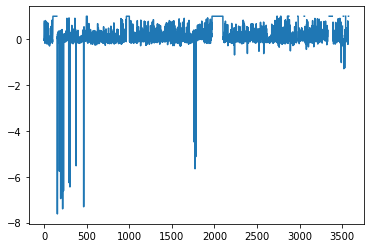

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_data,errorrate)

In [25]:
y.mean()

99267.93980145415

In [26]:
a.mean()

87788.13490871915